# The Role of Absenteeism Prediction Mechanisms In Enhancement of Organization Health 

## Introduction:
In our combined experiences with working for small and large companies, we have seen that companies care a lot about the absenteeism rate in the workplace. From start-ups to multinational companies, all keep track of this one particular factor. Some organizations have entire units developed to just keep track of absent employees and the losses undertaken because of this absenteeism. Clearly, this information is valuable to organizations trying to account for their employees’ productivity and for charting out future growth of the company.

###   Motivation: 
The motivation for this project comes from our experience working at various start-ups and how absenteeism on the part of our peers would impact our own work and the final output. It is a well-known fact that absenteeism impacts the final solution that any organization is able to develop. We are cognizant of the idea of the requirement of well-intentioned breaks from work and the essence and need for them. However, when absenteeism is unaccounted for, it causes delays in project deliveries and multitudes of unforeseen losses. 

Now, for clarity, the most commonly known reasons for being absent at work is sickness. That is an obvious one. But could there be other reasons that factor into an employee’s decision to be absent from work? We feel there are other underlying features that could be used as predictors of absenteeism, such as age, distance from work, hitting your target etc. If an organization can access these underlying predictors for people being absent at work, they would be empowered to change business processes and company cultures to suit their employee’s needs.

### Problem Statement:
For this project we are looking at data records for employees working in a courier company in Brazil from July 2007 to July 2010. We will focus on two distinct broad tasks to obtain results. First, we want to identify the parameters that impact absenteeism the most. We then use these parameters to fit multiple machine learning models to our model that will help predict absenteeism for this company. The model that comes out with highest accuracy will be the model that we finally utilize. 

### Data: 
Our data is pulled from the UCI machine learning repository. There are 740 unique entries of employees who were granted a sick leave. 20 possible predictors were recorded for each leave and some of them are pre-encoded as digits:
1.	Reason for absence: most sick leave were granted upon an attested medical proofs or other medical conditions, with one exception of “unjustified absence” (encoded as 25), which we will take a look at in our analysis. 
2.	Month of absence: 1 to 12 for January to December
3.	Day of the week: 2 to 6 for Monday to Friday
4.	Season: 1 to 4 for Summer, Autumn, Winter, Spring respectively
5.	Transportation expense: in Brazalian dollar  
6.	Distance from Residence to Work : in km   
7.	Service time:  in years of how long the employee has been with the company
8.	Age: in years
9.	Work load Average/day: 
10.	Hit target: in percentage, i.e. 97% hitting the target 
11.	Disciplinary failure:  yes=1; no=0
12.	Education:  high school (1), graduate (2), postgraduate (3), master and doctor (4)
13.	Son:  number of children
14.	Social drinker: yes=1; no=0
15.	Social smoker: yes=1; no=0
16.	Pet: number of pets
17.	Weight: in kg
18.	Height: in cm
19.	Body mass index
20.	Absenteeism time: in hours 




### Data Limitations: 
There are two distinct limitations we have identified while working with this dataset that will potentially hinder the work and the accuracy of the model. 

#### 1.Limitation of dataset:
Some of the features that factor into our analysis lack descriptions or units of what they mean in real translations. For example, the average workload per day is around 200,000 per day. We have not found any sources of infomration to indicate what the unit of this feature is. We have tried to think of it as mintues sitting in office perday, miles drove for delivery, mails/packages processed, etc. But none fits the value right.

#### 2.Incomplete dataset: 
The dataset consists of only 740 records which are only employees that have been absent in the provided duration. However, there is no information on the employees that were never absent at the workplace. Having that piece of information would be crucial to concluding the real impact of these factors on absenteeism at thsi company. So while ideally we would need a column that categorically distinguishes between absent or not absent, we only a column that gives the number of hours that someone was absent for, since the data only has absenteeism information. 

#### Adjustments based on limitations:
Cognizant of these major flaws in the dataset, we have modified how we look at the labels of our dependent variable. We have taken steps to categorize the 'number of hours' absent to values that describe the strength of absenteeism - half day, full day etc.  

### Qualification: 
While there are plenty of projects that are done based on this dataset, most on them focus on whether seasonality played a role in employee’s absenteeism. Some focus on age and service time. However, we want to focus on the company-controllable factors such as transportation expense, distance from work, work load, hitting target, and disciplinary failure. 

In addition, we want to point out the dataset is exclusively collected from the Brazilian Courier Company. The factors that we are analyzing (hitting target, distance from work, etc) can vary based on different social and cultural context. For example, culturally speaking, Brazilian company maybe more laid back about hitting the target than the same employees from a Japanese Company (where discipline is emphasized). Also, the infrastructure in Brazil may cause issues with commute time of less than 20 mintues, whereas employees working in NYC, LA, etc., may easily travel an hour and more to go to work. This makes our conclusion relatively exclusive to the company where our dataset is collected from. Therefore, we see the value of our report comes from two place. First, providing solid suggestions for the Brazilian Courier Company management on how to control the absenteeism in this particular company. Second, providing providing a model that can be reproducable at other companies with their specific predictors involved


### EDA & Parameter Identification

In [3]:
import pandas as pd
import numpy as np
raw = pd.read_csv("Absenteeism_at_work.csv", header = 1)

In [4]:
#read the raw data
raw.head()

,Unnamed: 0,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,11,26,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,4
1,1,36,0,7,3,1,118,13,18,50,...,1,1,1,1,0,0,98,178,31,0
2,2,3,23,7,4,1,179,51,18,38,...,0,1,0,1,0,0,89,170,31,2
3,3,7,7,7,5,1,279,5,14,39,...,0,1,2,1,1,0,68,168,24,4
4,4,11,23,7,5,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,2


In [5]:
#take a look at columns
for col in raw.columns: 
    print(col)

Unnamed: 0
ID
Reason for absence
Month of absence
Day of the week
Seasons
Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average/day 
Hit target
Disciplinary failure
Education
Son
Social drinker
Social smoker
Pet
Weight
Height
Body mass index
Absenteeism time in hours


### Important Considerations:
Since we do not want the 'sickness' to factor into this analysis, we eliminate those columns first. For the 20 predictors other than the obvious sickness factors, we want to eliminate ones that relate to factors such as social drinker or number of sons etc. We believe a company using this information on whether a person is a social drinker or not would not render actionable policies for the company, and may even result in unwarranted discrimiation against certain groups of people. 

In [6]:
#dropped columns that are not of interest 
raw_dropped = raw.drop(raw.columns[
    [0, 1, 2, 3, 4, 5, 13, 14, 15, 16, 17, 18, 19, 20]], axis=1)

In [7]:
raw_dropped.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Absenteeism time in hours
0,289,36,13,33,239554,97,0,4
1,118,13,18,50,239554,97,1,0
2,179,51,18,38,239554,97,0,2
3,279,5,14,39,239554,97,0,4
4,289,36,13,33,239554,97,0,2


### First, we examine the overall absenteeism time in the workplace
We can find that employee in general take a leave for less than 3 hours, There is another group of people who take a leave for 8 hours, which we believe to be a "full-day absent".

In [8]:
absent = raw_dropped["Absenteeism time in hours"]
absent = absent.to_frame()
absent.columns = ['A_Hours']

absent

,A_Hours
0,4
1,0
2,2
3,4
4,2
...,...
735,8
736,4
737,0
738,0


In [9]:
#total number of absenteeism cases
absent.count()

A_Hours    740
dtype: int64

In [10]:
#distributions of different absent hours
absent.groupby('A_Hours')['A_Hours'].count()

A_Hours
0       44
1       88
2      157
3      112
4       60
5        7
7        1
8      208
16      19
24      16
32       6
40       7
48       1
56       2
64       3
80       3
104      1
112      2
120      3
Name: A_Hours, dtype: int64

### Second, we analyze if age affects absenteeism in the work place
The oldest age-group (58 years old) takes the longest leave three times higher than any other age group. 

In addition, age group of 30 has the second longest absent hours. This group of peple are likely to be the mid-management in the company, and their absenteeism may cause the most delay in work. 

In [11]:
age = raw_dropped
age = raw_dropped.drop(raw_dropped.columns[
    [0, 1, 2, 4, 5,6]], axis=1)
age 

,Age,Absenteeism time in hours
0,33,4
1,50,0
2,38,2
3,39,4
4,33,2
...,...,...
735,33,8
736,37,4
737,40,0
738,39,0


In [12]:
#amount of absenteeism in each age
age.groupby('Age').agg(["count", "mean"])

Absenteeism time in hours           
                        count       mean
Age                                     
27                          7   3.857143
28                        117   5.564103
29                          7   4.428571
30                         46   5.500000
31                         22   9.863636
32                         13   3.692308
33                         51  10.549020
34                         29  16.413793
36                         50   6.920000
37                         78   5.961538
38                        113   4.265487
39                          8   3.750000
40                         58   6.534483
41                         34   8.088235
43                         24   7.791667
46                          2   8.000000
47                         24   3.041667
48                          6   4.166667
49                          5   3.200000
50                         37   8.837838
53                          1   0.000000
58                          8  32.750000

### Third, we analyze if service time affect absenteeism
It seems like on average, employees in their 10th year onward are more likely to take a longer leave. The average absent hours for employee serving less than 10 year are about 5 hours, whereas that for employee serving more than 10 years are around 7 hours.


In [13]:
service = raw_dropped
service = raw_dropped.drop(raw_dropped.columns[
    [0, 1, 3, 4, 5, 6]], axis=1)
service

,Service time,Absenteeism time in hours
0,13,4
1,18,0
2,18,2
3,14,4
4,13,2
...,...,...
735,13,8
736,14,4
737,13,0
738,14,0


In [14]:
#amount of absenteeism in each service time
service.groupby('Service time')\
    .agg(["count", "mean"])

Absenteeism time in hours           
                                 count       mean
Service time                                     
1                                    7   4.857143
3                                   24   7.750000
4                                   16   7.375000
6                                    7   4.428571
7                                    7   3.857143
8                                   13   4.461538
9                                  126   4.888889
10                                  55   6.254545
11                                  50   6.920000
12                                  61   7.655738
13                                  73   9.712329
14                                  85   8.235294
15                                   4   5.250000
16                                  38  13.578947
17                                  20   6.300000
18                                 147   5.394558
24                                   2   8.000000
29                                   5   3.200000

### Longer service time doesn't necessarily mean older age, so, fourth, we examine if there is any relationship between service time and age together, which result in absenteeism
First, we found that servie time is indeed not linearly related to age (except for the younger employee of age less than 30).
Second, we found that within each age group, the hours of absent doesn't change linearly with the service time as well. This suggests that age-servcice time combinatin is not a valid feature to be tried for our model. 

In [2]:
age_service = raw_dropped
age_service = raw_dropped.drop(raw_dropped.columns[
    [0, 1, 4, 5, 6]], axis=1)
age_service 

NameError: name 'raw_dropped' is not defined

In [16]:
#amount of absenteeism in each age groupe for different service time
age_service.groupby(['Age', 'Service time'])\
    .agg(["count","mean"])

Absenteeism time in hours           
                                     count       mean
Age Service time                                     
27  7                                    7   3.857143
28  3                                   24   7.750000
    4                                   16   7.375000
    9                                   77   4.506494
29  6                                    7   4.428571
30  9                                   46   5.500000
31  1                                    7   4.857143
    12                                  15  12.200000
32  8                                   10   4.200000
    12                                   3   2.000000
33  8                                    3   5.333333
    13                                  48  10.875000
34  14                                  29  16.413793
36  11                                  50   6.920000
37  10                                  55   6.254545
    14                                  23   5.260870
38  18                                 113   4.265487
39  14                                   8   3.750000
40  12                                  37   6.837838
    13                                   1   0.000000
    17                                  20   6.300000
41  15                                   4   5.250000
    16                                  30   8.466667
43  13                                  24   7.791667
46  24                                   2   8.000000
47  14                                  24   3.041667
48  12                                   6   4.166667
49  29                                   5   3.200000
50  9                                    3   5.333333
    18                                  34   9.147059
53  14                                   1   0.000000
58  16                                   8  32.750000

### Fifth, transportation expense and its impact on Absenteeism
Suprisingly, there is no apparent relation between tranportation expense and absenteeism. We wonder if it would indirectly impact the absenteeism.

In [17]:
tranp = raw_dropped
tranp = raw_dropped.drop(raw_dropped.columns[
    [1, 2, 3, 4, 5, 6]], axis=1)
tranp  

,Transportation expense,Absenteeism time in hours
0,289,4
1,118,0
2,179,2
3,279,4
4,289,2
...,...,...
735,289,8
736,235,4
737,118,0
738,231,0


In [18]:
#transporation expense in brazilian dollar
tranp.groupby('Transportation expense')\
        .agg(['count','mean'])

Absenteeism time in hours           
                                           count       mean
Transportation expense                                     
118                                           92   7.293478
155                                           29  16.413793
157                                            7   4.428571
179                                          180   4.783333
184                                            7   3.857143
189                                            8   9.000000
225                                           81   4.543210
228                                            8  32.750000
231                                            2   0.000000
233                                            7   4.857143
235                                           58   5.034483
246                                           30   8.466667
248                                           24   3.041667
260                                           42   7.285714
268                                            3   5.333333
279                                            6   5.000000
289                                           45  10.355556
291                                           40   6.475000
300                                            5  16.600000
330                                           16   7.375000
361                                           24   7.750000
369                                           15  12.200000
378                                            8   5.000000
388                                            3   5.333333

In [19]:
#for better readability we divide the transportation 
# expense into 5 groups (388-118)/5
tranp_converted = tranp

c = pd.cut(
    tranp["Transportation expense"].to_frame().stack(),
    [-np.inf, 172, 226, 280,334, np.inf],
    labels=['Very Low', 'Low', 'Average', 'High', 'Very High']
)

tranp_converted["Transportation expense"] = c.unstack()
tranp_converted  

,Transportation expense,Absenteeism time in hours
0,High,4
1,Very Low,0
2,Low,2
3,Average,4
4,High,2
...,...,...
735,High,8
736,Average,4
737,Very Low,0
738,Average,0


In [20]:
#transporation expense in brazilian dollar 
# against number of asenteeism and average absent hours
tranp_converted.groupby('Transportation expense').agg(['count','mean'])

Absenteeism time in hours          
                                           count      mean
Transportation expense                                    
Average                                      180  7.038889
High                                         106  8.735849
Low                                          276  4.811594
Very High                                     50  8.500000
Very Low                                     128  9.203125

### Sixth, Impact of distance from home on Absenteeism
Suprisingly again, employee who are cloesr to home are more likely to take a longer leave.

In [21]:
dist = raw_dropped
dist = raw_dropped.drop(raw_dropped.columns[
    [0, 2, 3, 4, 5, 6]], axis=1)
dist

,Distance from Residence to Work,Absenteeism time in hours
0,36,4
1,13,0
2,51,2
3,5,4
4,36,2
...,...,...
735,36,8
736,11,4
737,14,0
738,35,0


In [22]:
#distance in km
dist.groupby('Distance from Residence to Work')\
    ['Absenteeism time in hours'].agg(['count','mean'])

,count,mean
Distance from Residence to Work,,
5,6,5.000000
10,55,6.254545
11,26,5.269231
12,29,16.413793
13,34,9.147059
14,9,29.111111
15,9,5.888889
16,26,6.153846
17,15,12.200000


In [23]:
#for better readability we divide the distance
# expense into 5 groups (55-5)/5
dist_converted = dist

c2 = pd.cut(
    dist["Distance from Residence to Work"].to_frame().stack(),
    [-np.inf, 10, 20, 30,40, np.inf],
    labels=['Very Near', 'Near', 'Average', 'Far', 'Very Far']
)

dist_converted["Distance from Residence to Work"] = c2.unstack()
dist_converted  

,Distance from Residence to Work,Absenteeism time in hours
0,Far,4
1,Near,0
2,Very Far,2
3,Very Near,4
4,Far,2
...,...,...
735,Far,8
736,Near,4
737,Near,0
738,Far,0


In [24]:
#distance in km 
# against number of asenteeism and average absent hours
dist_converted.groupby("Distance from Residence to Work")\
               .agg(['count','mean'])

Absenteeism time in hours           
                                                    count       mean
Distance from Residence to Work                                     
Average                                               223   5.668161
Far                                                    79   8.898734
Near                                                  167  10.095808
Very Far                                              210   5.223810
Very Near                                              61   6.131148

### Seventh, similar to age/service time, we want to see if distance and transportation expense have any interaction effect on absenteeism
Combining the two featues together, we see that Low transportation cost does result in lower absent hours. But withint the same transpotation cost group, people living nearer to the company are still more likely to take longer leave

In [25]:
tranp_dist1_cat  = tranp_converted.merge(dist_converted,
                                    left_index=True, right_index=True)
tranp_dist1_cat = tranp_dist1_cat.drop("Absenteeism time in hours_x",1)
tranp_dist1_cat  

,Transportation expense,Distance from Residence to Work,Absenteeism time in hours_y
0,High,Far,4
1,Very Low,Near,0
2,Low,Very Far,2
3,Average,Very Near,4
4,High,Far,2
...,...,...,...
735,High,Far,8
736,Average,Near,4
737,Very Low,Near,0
738,Average,Far,0


In [26]:
#we first examine the variables in their categorical term
tranp_dist1_cat.groupby(['Transportation expense', 
                    'Distance from Residence to Work'])\
        ['Absenteeism time in hours_y'].agg(['count','mean'])

count       mean
Transportation expense Distance from Residence to Work                  
Average                Average                             60   5.866667
                       Far                                  2   0.000000
                       Near                                63   8.650794
                       Very Far                            49   6.938776
                       Very Near                            6   5.000000
High                   Average                              5  16.600000
                       Far                                 77   9.129870
                       Near                                16   7.375000
                       Very Far                             8   2.750000
Low                    Average                            151   5.284768
                       Near                                 4   5.250000
                       Very Far                           121   4.206612
Very High              Near                                18  11.055556
                       Very Far                            32   7.062500
Very Low               Average                              7   4.428571
                       Near                                66  12.166667
                       Very Near                           55   6.254545

In [27]:
#we then examine the variables in their numerical value
# we divde expense by distance to get a Brazilian dollar per km unit
tranp_dist_num = raw_dropped.drop(raw_dropped.columns[
    [2,3 , 4, 5, 6]], axis=1)
tranp_dist_num["$/km"] = tranp_dist_num["Transportation expense"]/  \
    tranp_dist_num['Distance from Residence to Work']

tranp_dist_num  

,Transportation expense,Distance from Residence to Work,Absenteeism time in hours,$/km
0,289,36,4,8.027778
1,118,13,0,9.076923
2,179,51,2,3.509804
3,279,5,4,55.800000
4,289,36,2,8.027778
...,...,...,...,...
735,289,36,8,8.027778
736,235,11,4,21.363636
737,118,14,0,8.428571
738,231,35,0,6.600000


In [28]:
#examine the average dollar per km for each absent hour term
tranp_dist_num.groupby('Absenteeism time in hours')['$/km'].mean()

Absenteeism time in hours
0      12.737850
1       8.565375
2       8.774078
3       7.697452
4       9.654260
5       9.416277
7       6.942308
8      10.503285
16     11.929320
24      9.833464
32      9.246891
40      8.765233
48     12.916667
56      8.500000
64     10.074359
80     14.566491
104     8.027778
112    12.469780
120    12.759768
Name: $/km, dtype: float64

### Eighth, we look at how workload affects Absenteeism
Employee with average to higher workload takes longer leave.

In [29]:
#the workload is in its real term, and involved some formula 
# that we couldn't found on line, we look at the stat summary
# of this data
workload = raw_dropped
workload = raw_dropped.drop(raw_dropped.columns[
    [0, 1, 2, 3,5,6]], axis=1)
workload.columns =["Workload", "A_hours"]

print(workload["Workload"].describe())
print("Median ", workload["Workload"].median())

#positive skewness (more people on the higher workload end)
print("Skewness ", workload["Workload"].skew())

#<3 kutosis (little outliers)
print("Kurtosis ",workload["Workload"].kurtosis())

count       740.000000
mean     271490.235135
std       39058.116188
min      205917.000000
25%      244387.000000
50%      264249.000000
75%      294217.000000
max      378884.000000
Name: Workload, dtype: float64
Median  264249.0
Skewness  0.9614566084490213
Kurtosis  0.6181879633231189


In [30]:
#we categorize the workload into 5 categories
work_converted = workload

c3 = pd.cut(
    workload["Workload"].to_frame().stack(),
    [-np.inf, 292968, 314446, 335924, 357402, np.inf],
    labels=['Very Low', 'Low', 'Average', 'High', 'Very High']
)

work_converted["Workload"] = c3.unstack()
work_converted

,Workload,A_hours
0,Very Low,4
1,Very Low,0
2,Very Low,2
3,Very Low,4
4,Very Low,2
...,...,...
735,Very Low,8
736,Very Low,4
737,Very Low,0
738,Very Low,0


In [31]:
#Workload against number of asenteeism and average absent hours
work_converted.groupby("Workload")\
    .agg(['count','mean'])

A_hours          
            count      mean
Workload                   
Average        31  8.645161
High           29  9.689655
Low            94  5.946809
Very High      32  8.812500
Very Low      554  6.740072

#### Interestingly, more workload doesn't seem to encourage absenteeism.
### Ninth, we take a look at whether hitting your targets or not encourages absenteeism
There seems to be no direct relationship between hitting target and absenteeism. However, we also lack of the information on whether hitting 87% differed a lot from hitting 94%.

In [32]:
target = raw_dropped
target = raw_dropped.drop(raw_dropped.columns[
    [0, 1, 2, 3,4,6]], axis=1)

target.describe()

,Hit target,Absenteeism time in hours
count,740.000000,740.000000
mean,94.587838,6.924324
std,3.779313,13.330998
min,81.000000,0.000000
25%,93.000000,2.000000
50%,95.000000,3.000000
75%,97.000000,8.000000
max,100.000000,120.000000


In [33]:
target.groupby("Hit target").agg(["count", "mean"])

Absenteeism time in hours          
                               count      mean
Hit target                                    
81                                19  8.578947
87                                12  3.416667
88                                28  6.285714
91                                45  4.733333
92                                79  6.620253
93                               105  7.152381
94                                34  7.735294
95                                75  6.173333
96                                75  6.480000
97                                89  6.876404
98                                66  9.181818
99                               102  7.382353
100                               11  6.727273

### Tenth, we combine hitting target and workload to see if there is any relationship between the two together that affests absenteeism
Withitn the same hitting target group,  highes workload contributes to longer absent hours.

In [34]:
work_hit = work_converted.merge(target,left_index=True, right_index=True)

work_hit = work_hit.drop("A_hours",1)

work_hit 

,Workload,Hit target,Absenteeism time in hours
0,Very Low,97,4
1,Very Low,97,0
2,Very Low,97,2
3,Very Low,97,4
4,Very Low,97,2
...,...,...,...
735,Very Low,93,8
736,Very Low,93,4
737,Very Low,95,0
738,Very Low,95,0


In [35]:
#we first examine the variables in their categorical term
work_hit.groupby(['Hit target', 
                    'Workload'])\
        .agg(['count','mean'])

Absenteeism time in hours           
                                         count       mean
Hit target Workload                                      
81         Low                              19   8.578947
87         Very Low                         12   3.416667
88         Very Low                         28   6.285714
91         Very Low                         45   4.733333
92         Very High                        16   5.687500
           Very Low                         63   6.857143
93         Low                              18   8.944444
           Very Low                         87   6.781609
94         Very High                        16  11.937500
           Very Low                         18   4.000000
95         High                             29   9.689655
           Low                              24   2.500000
           Very Low                         22   5.545455
96         Average                          20   9.700000
           Low                              15   5.866667
           Very Low                         40   5.100000
97         Very Low                         89   6.876404
98         Very Low                         66   9.181818
99         Low                              18   4.833333
           Very Low                         84   7.928571
100        Average                          11   6.727273

### Eleventh, we want to further incorporate the impact of disciplinary failure on absentism
### In case it does, we would want to see its combined impact alongwith workload and hitting target on encouraging absenteeism

Disciplinary failure doesn't lead to more absent hours, in fact it leads to all absent hour less than one hour. This might be because the employee who already had a disciplinary failure are less willing to take a leave, which may leave worse impression on their supervisor.

In [36]:
displine = raw_dropped
displine = raw_dropped.drop(raw_dropped.columns[
    [0, 1, 2, 3,4,5]], axis=1)
displine 

,Disciplinary failure,Absenteeism time in hours
0,0,4
1,1,0
2,0,2
3,0,4
4,0,2
...,...,...
735,0,8
736,0,4
737,0,0
738,0,0


In [37]:
displine.groupby("Disciplinary failure").agg(["count", "mean"])

Absenteeism time in hours      
                                         count  mean
Disciplinary failure                                
0                                          700  7.32
1                                           40  0.00

In [38]:
dis_work_hit = work_hit.merge(displine,left_index=True, right_index=True)
dis_work_hit = dis_work_hit.drop("Absenteeism time in hours_x",1)
dis_work_hit 

,Workload,Hit target,Disciplinary failure,Absenteeism time in hours_y
0,Very Low,97,0,4
1,Very Low,97,1,0
2,Very Low,97,0,2
3,Very Low,97,0,4
4,Very Low,97,0,2
...,...,...,...,...
735,Very Low,93,0,8
736,Very Low,93,0,4
737,Very Low,95,0,0
738,Very Low,95,0,0


In [39]:
dis_work_hit.groupby(
    ["Disciplinary failure", "Hit target", "Workload"])\
    .agg(["count", "mean"])

Absenteeism time in hours_y  \
                                                                count   
Disciplinary failure Hit target Workload                                
0                    81         Low                                15   
                     87         Very Low                           12   
                     88         Very Low                           21   
                     91         Very Low                           44   
                     92         Very High                          12   
                                Very Low                           58   
                     93         Low                                18   
                                Very Low                           83   
                     94         Very High                          16   
                                Very Low                           18   
                     95         High                               29   
                                Low                                24   
                                Very Low                           21   
                     96         Average                            19   
                                Low                                15   
                                Very Low                           38   
                     97         Very Low                           85   
                     98         Very Low                           61   
                     99         Low                                18   
                                Very Low                           82   
                     100        Average                            11   
1                    81         Low                                 4   
                     88         Very Low                            7   
                     91         Very Low                            1   
                     92         Very High                           4   
                                Very Low                            5   
                     93         Very Low                            4   
                     95         Very Low                            1   
                     96         Average                             1   
                                Very Low                            2   
                     97         Very Low                            4   
                     98         Very Low                            5   
                     99         Very Low                            2   

                                                      
                                                mean  
Disciplinary failure Hit target Workload              
0                    81         Low        10.866667  
                     87         Very Low    3.416667  
                     88         Very Low    8.380952  
                     91         Very Low    4.840909  
                     92         Very High   7.583333  
                                Very Low    7.448276  
                     93         Low         8.944444  
                                Very Low    7.108434  
                     94         Very High  11.937500  
                                Very Low    4.000000  
                     95         High        9.689655  
                                Low         2.500000  
                                Very Low    5.809524  
                     96         Average    10.210526  
                                Low         5.866667  
                                Very Low    5.368421  
                     97         Very Low    7.200000  
                     98         Very Low    9.934426  
                     99         Low         4.833333  
                                Very Low    8.121951  
                     100        Average     6.727273  
1                    81         Low         0.000000  
                     88         Very L

### For the sake of better visual comprehension, we now look at visualizations of this analysis to better understand teh correlation of these factors and absenteesm

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [41]:
raw_dropped.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Absenteeism time in hours
0,289,36,13,33,239554,97,0,4
1,118,13,18,50,239554,97,1,0
2,179,51,18,38,239554,97,0,2
3,279,5,14,39,239554,97,0,4
4,289,36,13,33,239554,97,0,2


### Looking at Absentism based on Age

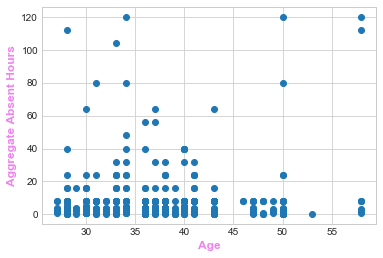

In [42]:

plt.scatter(raw_dropped["Age"], raw_dropped["Absenteeism time in hours"])
plt.xlabel('Age', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')
plt.ylabel('Aggregate Absent Hours', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')


plt.show()

### Analyzing the number of hours of absenteeism based on workload

In [2]:

names = work_hit["Workload"].unique()
#names

values = work_hit
values = values.groupby("Workload").sum()

plt.figure(figsize=(9, 3))
plt.bar(names,values["Absenteeism time in hours"])
plt.xlabel('Workload', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')
plt.ylabel('Aggregate Absent Hours', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')



NameError: name 'work_hit' is not defined


#### This tells us that maximum number of absenteeism is seen from people with the heaviest of work loads, on aggregation. However, as analyzed before, the mean absentism for heavy work load individuals is smaller than the rest. This needs further analysis 

### Analyzing the number of hours of absenteeism based on whether employees have hit their target 


Text(0, 0.5, 'Aggregate Absent Hours')

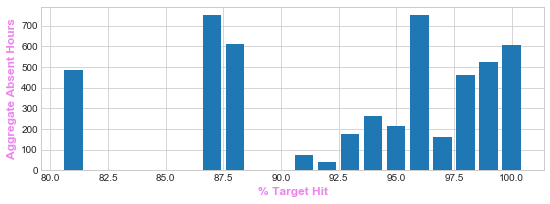

In [44]:
names = work_hit["Hit target"].unique()
#names

values = work_hit
values = values.groupby("Hit target").sum()

plt.figure(figsize=(9, 3))
plt.bar(names,values["Absenteeism time in hours"])
plt.xlabel('% Target Hit', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')
plt.ylabel('Aggregate Absent Hours', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')




#### We see some variation in the absenteesim trends with employees hitting the target between 80 and 100%. Our original understanding would have assumed that the employees with the lowest amount of targets met would be the most absent. That does not seem to be the case.

### Next we want to look at the visual representation of absentism based on distance of residence from work 


Text(0, 0.5, 'Aggregate Absent Hours')

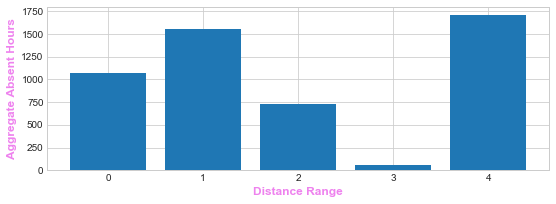

In [45]:

#For comprehensibility, we divide the distances into a range such that 1-15 miles in range 1; 16-30 miles is range 2..

d = {range(1, 15): 1, range(16, 30): 2, range(31, 45): 3, range(46, 60): 4, range(61, 75): 5, range(76, 90): 6}
distance_viz =raw_dropped

distance_viz['Distance'] = distance_viz['Distance from Residence to Work'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
distance_viz.head()


values = distance_viz.groupby('Distance').sum()
names = distance_viz['Distance'].unique()


plt.figure(figsize=(9, 3))
plt.bar(names,values["Absenteeism time in hours"])
plt.xlabel('Distance Range', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')
plt.ylabel('Aggregate Absent Hours', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')





#### Here, just as expected, we see that people staying farthest from work have a lot more absent hours. But interestingly people staying within 15 and 30 miles also have a lot of absent hours at work.

### We do a similar test with Transportation expense

Text(0, 0.5, 'Aggregate Absent Hours')

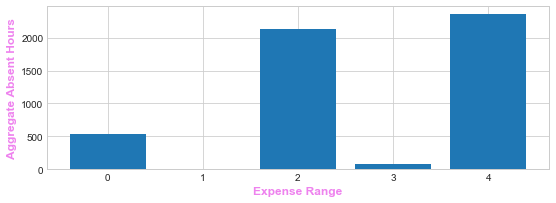

In [46]:
d = {range(1, 100): 1, range(101, 200): 2, range(201, 300): 3, range(301, 400): 4, range(401, 500): 5, range(501, 600): 6}
TransExpense =raw_dropped

TransExpense['Time'] = TransExpense['Transportation expense'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
TransExpense.head()


values = TransExpense.groupby('Time').sum()
names = TransExpense['Time'].unique()


plt.figure(figsize=(9, 3))
plt.bar(names,values["Absenteeism time in hours"])
plt.xlabel('Expense Range', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')
plt.ylabel('Aggregate Absent Hours', fontweight='bold', color = 'Violet', fontsize='12', horizontalalignment='center')





#### Here, we see some variation in the amount of absenteeism within employees depending on how much they spend on transport

### Implementing Machine Learning Models

Now, having run preliminary exploratory tests on the data, we move on to our second task - machine learning models to help predict future absentism. 



### Choice of models:
We ran the following models on the dataset:
1.Gaussian Naive Bayes
2.K-Nearest Neighbors
3.Support Vector Machine
4.Decision Trees

Before running these models though, we first need to encode our data. This is done to make data compatible with the models and provide more comprehensive results. This includes, among other things, encoding the absenteeism provided in hours into categories that define their strength, as discussed before. 



### Encoding

#### First we define the label (y), which is the absent hours
Absent hours in the dataset range from 0 to 120.We separate these hours into three main groups:

a. Less than or equal to 4 hours = half a work day

b. Between 4 and 8 hours = full work day

c. Above 8 hours = More than one work day 

They are represented by values 0,1,2

In [47]:
absent.groupby('A_Hours')['A_Hours'].count()

A_Hours
0       44
1       88
2      157
3      112
4       60
5        7
7        1
8      208
16      19
24      16
32       6
40       7
48       1
56       2
64       3
80       3
104      1
112      2
120      3
Name: A_Hours, dtype: int64

In [48]:
def yEncoder(h):
    '''
    this function encode the hours into 0 or 1 or 2
    given which range it falls into.
    '''
    if h <= 4:
        n = 0
    elif 4 < h <= 8:
        n = 1
    elif h > 8:
        n = 2
    else:
        print('This should not happen!')
    return n

In [49]:
def yArray(absent):
    '''
    this function converts the encoded hours into array
    so that it could be used in the model.
    '''
    arr = [ yEncoder(int(h)) for h in absent.A_Hours]
    return np.array(arr)

In [50]:
#after encoding, the absent values is as below
y = yArray(absent)
y

array([0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0,

In [51]:
#the shape of y
y.shape

(740,)

#### Second we define the features (x)
There are in total 7 featues to be fit in the model. 
Few of them such as transportation expense, distance to work, service time and disciplinary failure do not need further encoding and we therefore use them as is.For others such as workload and hitting target, we encode them for better understandability

In [52]:
raw_dropped.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Absenteeism time in hours,Distance,Time
0,289,36,13,33,239554,97,0,4,3,3
1,118,13,18,50,239554,97,1,0,1,2
2,179,51,18,38,239554,97,0,2,4,2
3,279,5,14,39,239554,97,0,4,1,3
4,289,36,13,33,239554,97,0,2,3,3


#### We convert workload into five categories 0 - 4 indicating very low, low, average, high, and very high workload

In [53]:

encoded_workload = pd.cut(
    raw_dropped["Work load Average/day "].to_frame().stack(),
    [-np.inf, 292968, 314446, 335924, 357402, np.inf],
    labels=[0, 1, 2, 3, 4]
)
raw_dropped["Work load Average/day "] = encoded_workload.unstack()
raw_dropped

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Absenteeism time in hours,Distance,Time
0,289,36,13,33,0,97,0,4,3,3
1,118,13,18,50,0,97,1,0,1,2
2,179,51,18,38,0,97,0,2,4,2
3,279,5,14,39,0,97,0,4,1,3
4,289,36,13,33,0,97,0,2,3,3
...,...,...,...,...,...,...,...,...,...,...
735,289,36,13,33,0,93,0,8,3,3
736,235,11,14,37,0,93,0,4,1,3
737,118,14,13,40,0,95,0,0,1,2
738,231,35,14,39,0,95,0,0,3,3


#### We then convert hitting target to binary. For this conversion we assume 95% and above as 1 (close to hitting target) and anything below as 0

In [54]:
encoded_target = pd.cut(
    raw_dropped["Hit target"].to_frame().stack(),
    [-np.inf,95, np.inf],
    labels=[0, 1]
)
raw_dropped["Hit target"] = encoded_target.unstack()
raw_dropped

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Absenteeism time in hours,Distance,Time
0,289,36,13,33,0,1,0,4,3,3
1,118,13,18,50,0,1,1,0,1,2
2,179,51,18,38,0,1,0,2,4,2
3,279,5,14,39,0,1,0,4,1,3
4,289,36,13,33,0,1,0,2,3,3
...,...,...,...,...,...,...,...,...,...,...
735,289,36,13,33,0,0,0,8,3,3
736,235,11,14,37,0,0,0,4,1,3
737,118,14,13,40,0,0,0,0,1,2
738,231,35,14,39,0,0,0,0,3,3


#### We then drop the last column, which is the label we will use (y value) and then convert this dataframe into numpy array


In [55]:
x = raw_dropped.drop(raw_dropped.columns[7], axis=1).to_numpy()

In [70]:
#the shape of x is  
x.shape

array([[289,  36,  13, ...,   0,   3,   3],
       [118,  13,  18, ...,   1,   1,   2],
       [179,  51,  18, ...,   0,   4,   2],
       ...,
       [118,  14,  13, ...,   0,   1,   2],
       [231,  35,  14, ...,   0,   3,   3],
       [179,  45,  14, ...,   0,   0,   2]])

### Splitting data into training set and testing set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [58]:
X_train.shape

(495, 9)

In [59]:
y_train.shape

(495,)

In [60]:
X_test.shape

(245, 9)

In [61]:
y_test.shape

(245,)

### Implementing Models

### Model1: Gussian Naive Bayes. 


In [62]:
# We will use a variation of NB 
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(X_train, y_train)

# make predictions
expected = y_test
predicted = model.predict(X_test)

In [63]:
# Import  metrics
from sklearn import metrics

# summarize the fit of the model

print(metrics.accuracy_score(expected, predicted))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

0.3346938775510204
              precision    recall  f1-score   support

           0       1.00      0.08      0.15       157
           1       0.30      0.88      0.45        69
           2       0.30      0.42      0.35        19

    accuracy                           0.33       245
   macro avg       0.53      0.46      0.32       245
weighted avg       0.75      0.33      0.25       245

[[ 13 133  11]
 [  0  61   8]
 [  0  11   8]]


#### Very Poor Results 
Naive Bayes assumes independence in between features. This allows us to fit many features without having to source a huge dataset. 

Our dataset is in fact small. We want to use a model that would use all of the features and make reasonable preidictions, given a small dataset (expecially if we split the datset into train and test, making it even smaller)

In order to fine-tune and improve the results of this method, we attempt to use cross validation and evaluate results

### Cross Validation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

In [ ]:
scores

In [ ]:
scores.mean()

#### Improved Results, but not enough
The cross validation does definitely improve the results obtained. However, 56% is not an impressive accuracy rate at all. We continue to explore other methods

### Model2: K-Nearest Neighbors

In [85]:

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

# make predictions
predicted2 = model2.predict(X_test)

In [87]:
print(metrics.accuracy_score(expected, predicted2))
print(metrics.classification_report(expected, predicted2))
print(metrics.confusion_matrix(expected, predicted2))

0.6408163265306123
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       157
           1       0.44      0.33      0.38        69
           2       0.38      0.16      0.22        19

    accuracy                           0.64       245
   macro avg       0.51      0.44      0.46       245
weighted avg       0.61      0.64      0.62       245

[[131  26   0]
 [ 41  23   5]
 [ 13   3   3]]


#### Better result.

KNN focusses on optimzing local points and finding the boundary locally. This is better suited for smaller dataset. In addition, KNN is non-parametric, unlike GNB, which gives the model more flexibility to draw the decision boundary. 


### Model3: Support Vector Machine


In [91]:
from sklearn import svm
model3 = svm.SVC(gamma='auto')
model3.fit(X_train, y_train)

#make predictions
predicted3 = model3.predict(X_test)

# summarize the fit of the model

print(metrics.accuracy_score(expected, predicted3))
print(metrics.classification_report(expected, predicted3))
print(metrics.confusion_matrix(expected, predicted3))

0.6489795918367347
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       157
           1       0.47      0.51      0.49        69
           2       0.00      0.00      0.00        19

    accuracy                           0.65       245
   macro avg       0.40      0.43      0.42       245
weighted avg       0.60      0.65      0.62       245

[[124  33   0]
 [ 34  35   0]
 [ 13   6   0]]


/Users/audreyliu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### The result is better, but not very significantly.

We were worried that KNN's local optimization strategy would be compromised with bad features. We have seen from our data processing stage that the features are not the most indicative features to the result. Therefore we used SVM for its good performance on small datasets and also for its ability to cope with outliers, and the ability to perform non-linear classicification with higher dimensional space (many features). 



### Model4: Decision Trees


In [ ]:

from sklearn import tree
model4 = tree.DecisionTreeClassifier()
model4 = model4.fit(X_train, y_train)

#make predictions
predicted4 = model4.predict(X_test)

# summarize the fit of the model

print(metrics.accuracy_score(expected, predicted4))
print(metrics.classification_report(expected, predicted4))
print(metrics.confusion_matrix(expected, predicted4))


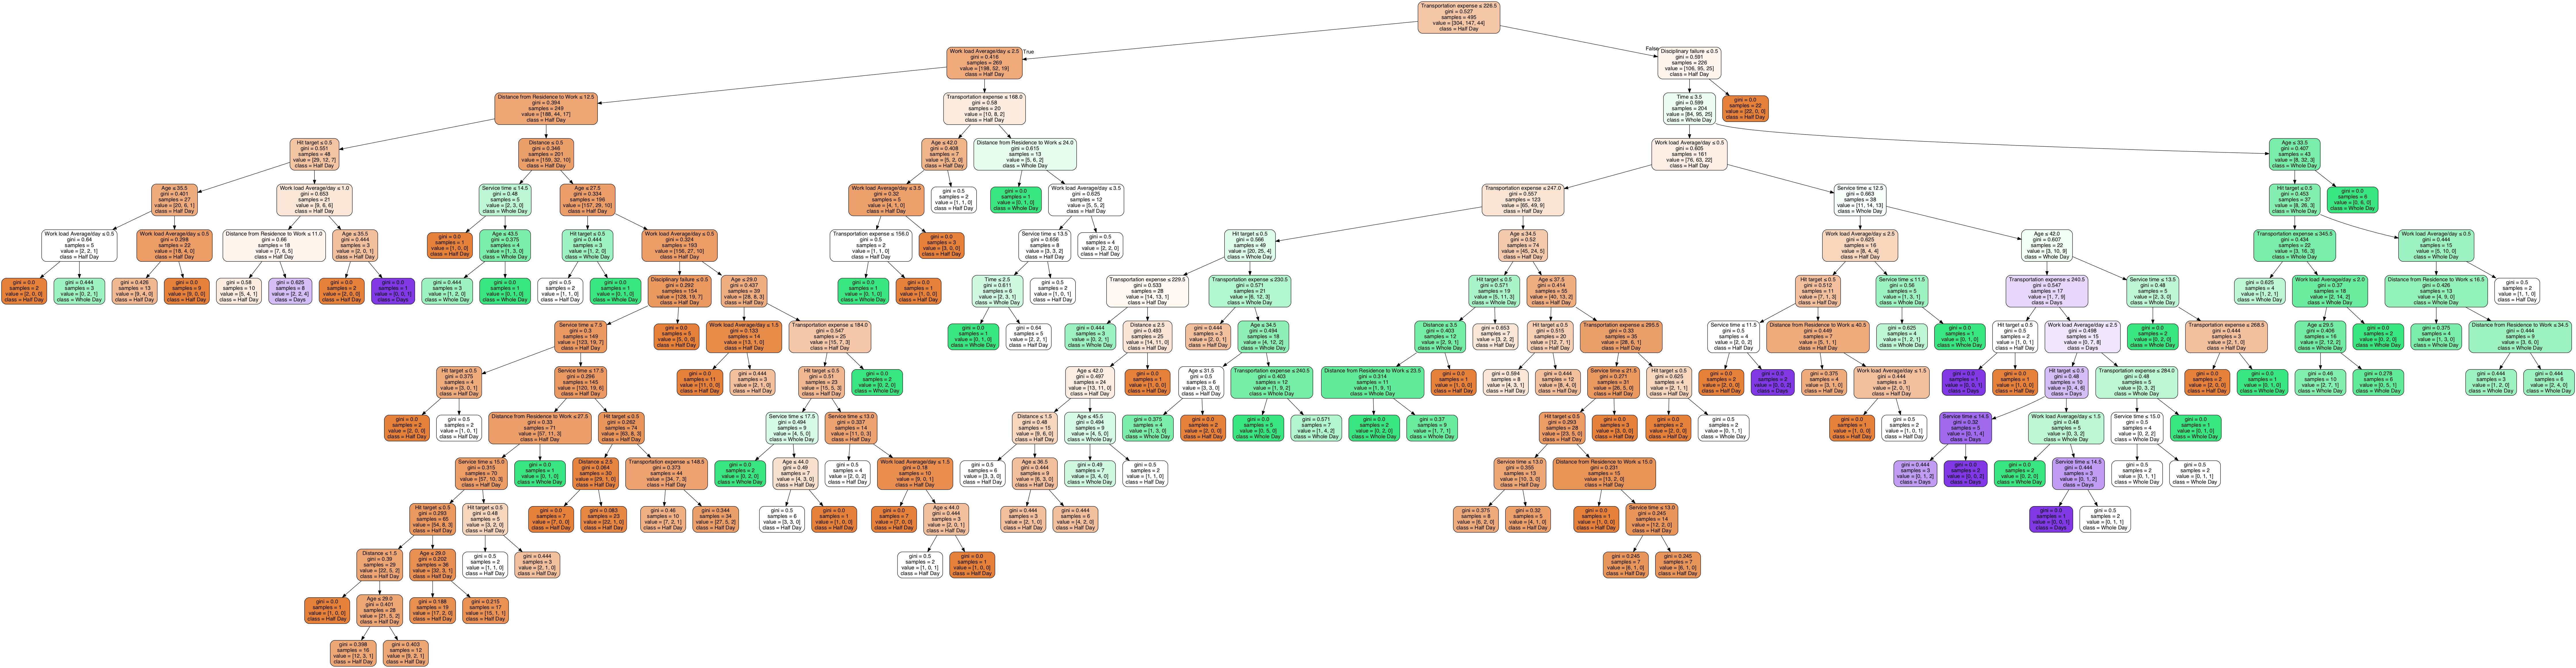

In [74]:
#model4 tree visualization
import graphviz 
from IPython.display import Image  
import pydotplus 
features = ["Transportation expense", "Distance from Residence to Work",
                 "Service time", "Age","Work load Average/day",
                 "Hit target", "Disciplinary failure","Distance","Time"]
labels = ["Half Day", "Whole Day", "Days"]

treePlot = tree.export_graphviz(model4, out_file=None,  
                feature_names=features,
                class_names=labels,
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(treePlot)
Image(graph.create_png())

In [77]:
#model4 tree in plain text
from sklearn.tree.export import export_text
r = export_text(model4, feature_names=features)
print(r)

|--- Transportation expense <= 226.50
|   |--- Work load Average/day <= 2.50
|   |   |--- Distance from Residence to Work <= 12.50
|   |   |   |--- Hit target <= 0.50
|   |   |   |   |--- Age <= 35.50
|   |   |   |   |   |--- Work load Average/day <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Work load Average/day >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  35.50
|   |   |   |   |   |--- Work load Average/day <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Work load Average/day >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Hit target >  0.50
|   |   |   |   |--- Work load Average/day <= 1.00
|   |   |   |   |   |--- Distance from Residence to Work <= 11.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Distance from Residence to Work >  11.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- Work load Average/day >  1.00
|   |   |   |   |   |--- Age <= 35.50
|   |   |

#### Most Reliable Results
We used this mainly to retrieve an interpretable graph to visualize how the model made its decision and to see what set of features define each of the three groups we created as label. 

Given its flexibility, this model performed the best out of the four we tried. But we are also aware, there might be problems of overfitting (the tree in the visualization graph is highly spread out, meaning a variety of combinations of feature thresholds have been used.) 

## Model Predictions

We were able to best achieve 69% accuracy in prediction of absenteeism at this organization. However, we are certain that the low accuracy is attributable to the limitations with the dataset in use. Mainly, the fact that we do not have any data or independent variables that identify employees that do partake in unplanned absenteeism. 

As completeness of the data improves and more information is presented to the model, the accuracy will certainly improve. 

## Model Conclusions:

From our EDA section, we had an idea that age of 30s and age of 50s, higher transportation cose, nearer distance from work,and higher workload contribute the likelihood of having longer absent hours.

Our model4 visualization, we also foudn that transportation cost and workload are the first and second features the model used to make deicision rules.

Therefore, for the Brazilian courier company, we would provide recommendations on the lines of the employee's workload and to provide transportation subsidy for absenteeism management. We have also found source that claimed Brazil is a country that has the worse commute hours and cost. This confirms that commute is a huge problem for many employee, and being able to reimburse some of the cost may change employee's absenteeism behavior. https://www.thrillist.com/news/nation/cities-with-the-worst-commutes-in-the-world-survey

With reference to analysts who want to scope out this project,  we suggest to use the KNN model as a prediction model, because KNN model provides 64% of accuracy with a very small dataset. Companies usually don't have enough employee to be considered having a large dataset, so dataset size is an important consideration in choosing model. In addition, we suggest using Deicision tree to visualize the model's deicision making process.


## Value Proposition

Absenteeism is disruptive and costly, no matter the size of the company. It, however, also signifies a withdrawal behaviour on the part of the employee that the organization needs to keep track of in order to control retention. 

### Cost of Absenteeism

#### Absenteeism in the United States alone costs between 8.5 to 26 billion dollars every year. 

#### •	Tangible Costs:

Tangible costs are the ones that are obvious and can be understood directly. Project deliverables and deadlines are assigned assuming a certain proportion of dedicated workforce and resource availability. While some amount of buffer time for paid time offs are accounted for, it’s the absenteeism which are unaccounted for, that can drastically impact the project work. With hightened absenteeism, projects need more time and resources to be allotted to them just to get the job done. While individually, these might seem like smaller costs, these can quickly add up across the organization. 

#### •	Intangible Costs:
When one employee is chronically absent, there is unintended movement of work content that occurs within the team. Research has time and again proven that increased workload can bring down the morale in the team. Effectively, the quality of the work deteriorates. Overtime, absenteeism across the organization can incur huge indirect losses just from low morale and over-worked employees.  

### How can organizations effectively utilize this prediction mechanism ?

Given the staggering costs, organizations must try to keep a check on absenteeism. Not only that, employers must also try to evaluate the underlying causes of absenteeism to decrease instances and cut costs. 

Armed with these predicton numbers, organizations will be able to: 
#### 1.	Implement strategic policies that decrease these occurances 
Having predicted absenteeism numbers, organizations can employ attendance tracking systems, if those were not previously in use, or change policies around the number of unplanned absent days. This brings more structure and accountability to work and project planning.
#### 2.	Improvise employee benefits and considerations by identifying factors that most impact absenteeism 
Just creating strict policy controls for absenteeism does not always help. Implementing the first recommendation in silo can have adverse impacts on the morale of the company. Therefore, it is equally important for the company to identify hidden and underlying causes for absenteeism, which this model helps you do. Knowing these factors, the organization can execute changes to its company policy to make it more favorable for employees to get to work. For example, if the distance from work is one of the major factors impacting absenteeism at work, the company could brainstorm ideas to provide accomodation to employees closer to work. A Cost/Benefit analysis of further steps would be needed; however, these are conversations that must be had and work contructively toward solving the problem.  

Something to note here is that these models might identify varied high impact factors for different organizations based on culture and geography. For example, while travelling a 20-mile distance to work might be causing absenteeism in an organization in rural Brazil, the same distance might not matter as much in a more developed country such as the US. 
Therefore, we want to emphasize that while the model itself is absolutely reproducible, these results are not generalizable across geographies or even organizations. 
#### 3.	Forecast future losses so they are not caught off-guard. Predicted losses are much better to take care of than unpredicted ones.   
The aforementione recommendations provide ways the company can put the model to use and implement long term policy changes. However, these changes are long term and it would be a while before absenteeism is brought down. In the meanwhile, organizations will continue to incur losses. Forecasting the possible losses in advance will aid organizations in budgeting for these occurrances. 


## Conclusion

#### “The goal is to turn data into information and information into insight.”
– Carly Fiorina, former chief executive officer, Hewlett Packard.

The best data is only as good as the insight or value it can generate. Organizations need to employ the data and models at their disposable to utilize its potential. The most essential value that a prediction mechanism such as this can provide an organization is the ability to improve not only the profits by cutting costs but also the overall health of the company, which in the long run will pay high dividends. 